In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import math
import pandas as pd
import functions as f
import sys, importlib
plt.rcParams.update({'font.size':20})

## Comparing ascending and descending in the multinomial model

In [8]:
with open('../model_output_files/mean_variance_stubbing.json', 'r') as file:
    results = json.load(file)

In [9]:
ns = np.zeros(235)
for i in range(1,100):
    ns[i-1] = i*10
for i in range(1,100):
    ns[98 + i] = i*1000
for i in range(0,37):
    ns[198 + i] = i*25_000 + 100_000

In [10]:
means = np.zeros((2,235))
vars = np.zeros((2,235))
for j in range(2):
    for i in range(235):
        means[j][i] = results[j][i]['mean']
        vars[j][i] = results[j][i]['var']
means = means / (1 + means)
vars = vars / (1 + vars)

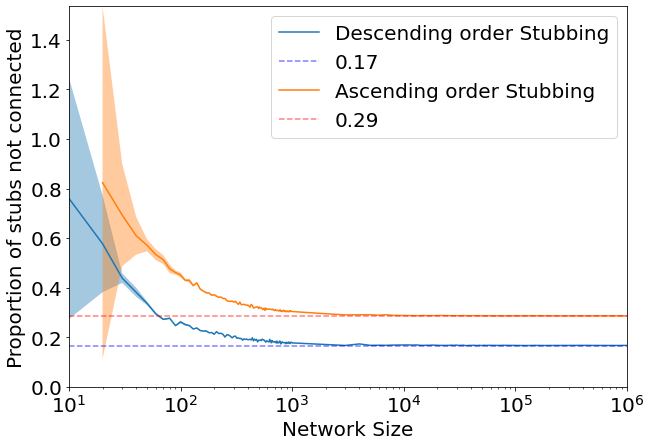

In [5]:
plt.figure(figsize=(10,7))
plt.plot(ns, means[0], label='Descending order Stubbing')
plt.fill_between(ns, means[0] - vars[0], means[0] + vars[0], alpha=0.4)
plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}')
plt.plot(ns, means[1], label='Ascending order Stubbing')
plt.fill_between(ns, means[1] - vars[1], means[1] + vars[1], alpha=0.4)
plt.plot([10,1e6], [min(means[1][1:]), min(means[1][1:])], '--r', alpha = 0.5, label = f'{round(min(means[1][1:]),2)}')
plt.xscale(value='log')
plt.ylabel('Proportion of stubs not connected')
plt.xlabel('Network Size')
# plt.yscale(value='log')
plt.ylim([0,max(means[1][1:]) + max(vars[1][1:])])
plt.xlim([10,1e6])
plt.legend()
plt.savefig("../../../../figures/important/3. stubbing/ascending_vs_descending.png", bbox_inches="tight")
plt.show()

### with improvement

In [7]:
with open('../model_output_files/fixed_mean_variance_stubbing.json', 'r') as file:
    fixed_results = json.load(file)

In [20]:
ns1 = np.zeros(len(fixed_results[0]))
for i in range(1,100):
    ns1[i-1] = i
for i in range(1,100):
    ns1[98 + i] = i*100
for i in range(1,101):
    ns1[197 + i] = i*10_000

# let mut ns: Vec<usize> = (1..100).collect();
# ns.append(&mut (1..100).map(|x| x*100).collect());
# ns.append(&mut (1..=100).map(|x| x*10_000).collect());

In [21]:
means1 = np.zeros((2,len(fixed_results[0])))
vars1 = np.zeros((2,len(fixed_results[0])))
for j in range(2):
    for i in range(len(fixed_results[0])):
        means1[j][i] = fixed_results[j][i]['mean']
        vars1[j][i] = fixed_results[j][i]['var']
means1 = means1 / (1 + means1)
vars1 = vars1 / (1 + vars1)

/tmp/ipykernel_7416/3073944280.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--b" (-> color='b'). The keyword argument will take precedence.
  plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}', color='blue')
/tmp/ipykernel_7416/3073944280.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--b" (-> color='b'). The keyword argument will take precedence.
  plt.plot([10,1e6], [min(means1[0][9:]), min(means1[0][9:])], '--b', alpha = 0.5, label = f'{round(min(means1[0][9:]),2)}', color='darkorange')


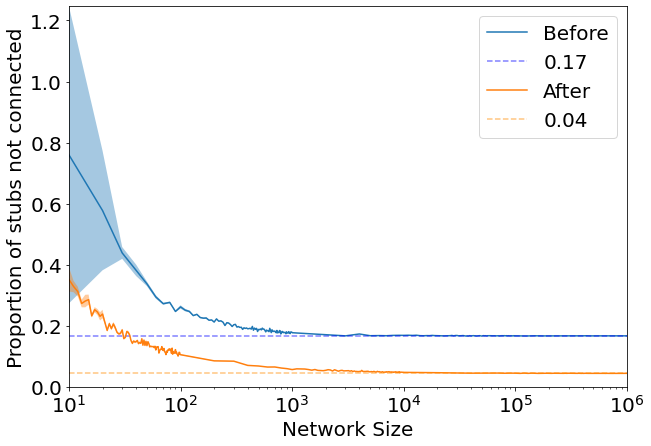

In [32]:
plt.figure(figsize=(10,7))
plt.plot(ns, means[0], label='Before')
plt.fill_between(ns, means[0] - vars[0], means[0] + vars[0], alpha=0.4)
plt.plot([10,1e6], [min(means[0]), min(means[0])], '--b', alpha = 0.5, label = f'{round(min(means[0]),2)}', color='blue')
plt.plot(ns1, means1[0], label='After')
plt.fill_between(ns1, means1[0] - vars1[0], means1[0] + vars1[0], alpha=0.4)
plt.plot([10,1e6], [min(means1[0][9:]), min(means1[0][9:])], '--b', alpha = 0.5, label = f'{round(min(means1[0][9:]),2)}', color='darkorange')
plt.xscale(value='log')
plt.ylabel('Proportion of stubs not connected')
plt.xlabel('Network Size')
# plt.yscale(value='log')
plt.ylim([0,max(means[0]) + max(vars[0])])
plt.xlim([10,1e6])
plt.legend()
plt.savefig("../../../../figures/important/4.fixing/before_vs_after_stubbing.png", bbox_inches="tight")
plt.show()

## Degree distribution of the multinomial model

In [7]:
with open('../model_output_files/network_multi_1.json', 'r') as file:
    network_multi_1 = json.load(file)
with open('../model_output_files/network_multi_2.json', 'r') as file:
    network_multi_2 = json.load(file)
with open('../model_output_files/network_sbm_1.json', 'r') as file:
    network_sbm_1 = json.load(file)
with open('../model_output_files/network_sbm_2.json', 'r') as file:
    network_sbm_2 = json.load(file) 
contacts1 = np.genfromtxt("../../../../data/CoMix_UK/contacts1.csv", delimiter=",")
contacts2 = np.genfromtxt("../../../../data/CoMix_UK/contacts2.csv", delimiter=",")
# df = pd.read_csv("../../../../data/CoMix_UK/merged_df_filter.csv")
# print(df.columns, len(df))
# df_1 = df[(df['sday_id'] >= "2020-07-30") & (df['sday_id'] < "2020-09-03")]
# df_2 = df[(df['sday_id'] >= "2020-09-03") & (df['sday_id'] <= "2020-10-26")]

In [36]:
# try log binning contacts, each bin is [A^(m-1), A^m), x position chosen as the geometric mean o fthe integers in the bin


array([3.67879441e-01, 4.63445030e-01, 5.83836094e-01, 7.35501651e-01,
       9.26566006e-01, 1.16726395e+00, 1.47048902e+00, 1.85248413e+00,
       2.33371172e+00, 2.93994983e+00, 3.70367295e+00, 4.66579165e+00,
       5.87784396e+00, 7.40475619e+00, 9.32832084e+00, 1.17515780e+01,
       1.48043348e+01, 1.86501191e+01, 2.34949389e+01, 2.95983179e+01,
       3.72871974e+01, 4.69734494e+01, 5.91759399e+01, 7.45483225e+01,
       9.39140537e+01, 1.18310502e+02, 1.49044519e+02, 1.87762440e+02,
       2.36538278e+02, 2.97984821e+02, 3.75393591e+02, 4.72911163e+02,
       5.95761283e+02, 7.50524696e+02, 9.45491652e+02, 1.19110599e+03,
       1.50052460e+03, 1.89032219e+03, 2.38137913e+03, 3.00000000e+03])

### Period 1

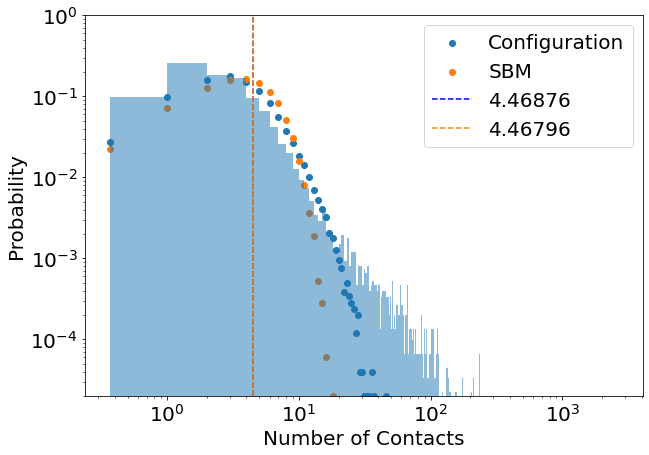

In [17]:
unique1 = np.unique(np.array(network_multi_1['degree']),return_counts=True)
unique2 = np.unique(np.array(network_sbm_1['degree']),return_counts=True)
unique1_vals = np.array([float(a) for a in unique1[0]])
unique1_vals[0] = 1/math.e
unique2_vals = np.array([float(a) for a in unique2[0]])
unique2_vals[0] = 1/math.e
contacts1 = np.array([1/math.e if a == 0 else a for a in contacts1])
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1_vals, unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2_vals, unique2[1]/sum(unique2[1]), label="SBM")
ax.hist(contacts1, bins=np.unique(contacts1), density=True,alpha=0.5)
ax.axvline(x=np.mean(network_multi_1['degree']), color='blue', linestyle='--', label=f'{np.mean(network_multi_1["degree"])}')
ax.axvline(x=np.mean(network_sbm_1['degree']), color='darkorange', linestyle='--', label=f'{np.mean(network_sbm_1["degree"])}')
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison1.png")
plt.show()

### Period 2 

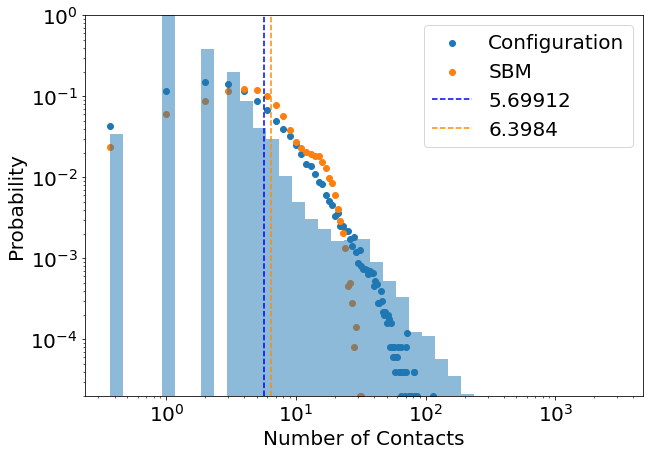

In [35]:
unique1 = np.unique(np.array(network_multi_2['degree']),return_counts=True)
unique2 = np.unique(np.array(network_sbm_2['degree']),return_counts=True)
unique1_vals = np.array([float(a) for a in unique1[0]])
unique1_vals[0] = 1/math.e
unique2_vals = np.array([float(a) for a in unique2[0]])
unique2_vals[0] = 1/math.e
contacts2 = np.array([1/math.e if a == 0 else a for a in contacts2])
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1_vals, unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2_vals, unique2[1]/sum(unique2[1]), label="SBM")
# normal binning
# ax.hist(contacts2, bins=np.unique(contacts2), density=True,alpha=0.5)
# logged bins
# ax.hist(contacts2, bins = 10 ** np.linspace(np.log10(1/math.e), np.log10(3000), 40),density=True,alpha=0.5)
ax.axvline(x=np.mean(network_multi_2['degree']), color='blue', linestyle='--', label=f'{np.mean(network_multi_2["degree"])}')
ax.axvline(x=np.mean(network_sbm_2['degree']), color='darkorange', linestyle='--', label=f'{np.mean(network_sbm_2["degree"])}')
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison1.png")
plt.show()